In [1]:
import sklearn
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 결정 트리
- 결정에 다다르기 위해 예/아니오 질문을 이어나가며 학습한다. 
- 질문이나 정답을 담은 것을 Node, 말단 노드를 Leaf, 연결선을 Edge 라고 한다. 
- 머신러닝에서는 아래는 생존과 사망을 구분하는 모델을 만든 것이다. 
- 이런 모델을 직접 만드는 대신 지도 학습 방식으로 데이터로부터 학습시켜 결정트리를 구축할 수 있다. 

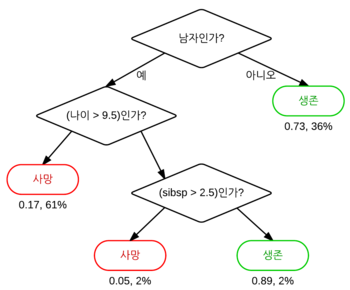

## 결정트리 만들기
- 데이터셋에 존재하는 데이터포인트들을 크게 두개로 나눌수 있는 정보를 골라서 루트노드(맨 위 노드)로 한다. 이 시점에서 깊이가 1이된다. 
- 두개로 나누어진 각 영역에서 각자 크게 두개로 나눌수 있는 정보를 골라서 노드를 만든다. -> 깊이2
- 이를 반복한다. 반복할 수록 깊이가 깊어진다. 
- 이런식으로 반복된 프로세스는 각 노드가 테스트 하나씩(Leaf)을 가질 때까지 반복하여 이진 결정 트리를 구축한다. 
- 나누다보면 딱 하나의 타깃값만을 가지는 리프 노드가 생길 수있는데 이를 순수노드(pure node)라고 한다. 
- 회귀 문제에서는 각 노드의 테스트 결과에 따라 트리를 탐색해나가고, 새로운 데이터 포인트에 해당하는 리프노드를 찾는다. 찾은 리프노드의 훈련 데이터의 평균값이 데이터 포인트의 출력이된다. 


# 결정트리의 복잡도
- 모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고, overfitting 된다. 
- 이를 막기위해 트리 생성을 일찍 중단하는 전략(사전 가지치기 : pre-pruning)과 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합하는 전략이 있다. 
- 사전 가지치기 방법은 트리의 최대 깊이(max_depth)나 리프의 최대 개수(max_leaf_nodes)를 제한하거나, 노드가 분할하기 위한 포인트의 최소 개수(min_samples_leaf)를 지정한다. 
- sklearn에서는 사전가지치기만 지원

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print('훈련 세트 정확도 : {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.937


- 결정 트리를 제한하지 않았기 때문에, 훈련 데이터의 모든 레이블을 완벽하게 기억할 만큼 충분히 깊게 만들어졌다. 
- 과대적합하기 쉽고 새로운 데이터에 일반화 되지 않는다. 
- 이번에는 사전 가지치기 기법을 통해 max_depth =4 의 매개변수를 주어 연속된 질문을 최대 4개로 제한하여 과대적합을 줄인다. 


In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)
print('훈련 세트 정확도 : {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.951


# 결정 트리 분석
 - export_graphviz 함수를 이용해 트리를 시각화한다. (.dot 파일 만들어줌)
 - graphviz 라이브러리로 시각화 진행(.dot 파일을 읽을 수있는 라이브러리)

In [4]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = 'tree.dot', class_names=['악성', '양성'],
                feature_names = cancer.feature_names, impurity=False, filled=True)


In [5]:
import graphviz

with open('tree.dot', encoding = 'utf-8') as f:
    dot_graph = f.read()

dot = graphviz.Source(dot_graph)
dot.format='png'
dot.render(filename='tree.png')

'tree.png.png'

In [6]:

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# 특성중요도
- 트리를 만드는 결정에 각 특성이 얼마나 중요한가를 평가하는 특성 중요도
- 0은 전혀 사용되지 않았다는 뜻이고, 1은 완벽하게 타깃 클래스를 예측했다는 뜻이다. 
- 전체 합은 1

In [7]:
print('특성 중요도:\n{}'.format(tree.feature_importances_))

특성 중요도:
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


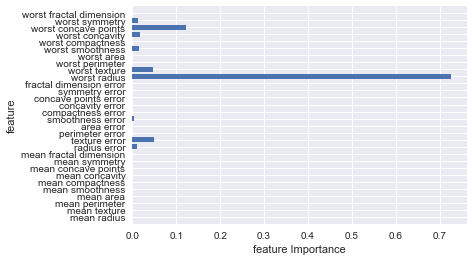

In [8]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('feature Importance')
    plt.ylabel('feature')
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

Feature importances: [ 0.  1.]


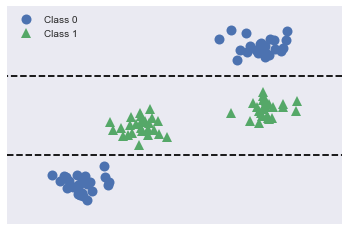

In [9]:
tree = mglearn.plots.plot_tree_not_monotone()

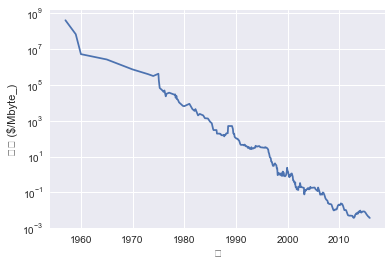

In [10]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('년')
plt.ylabel('가격 ($/Mbyte_)')

In [11]:
ram_prices.tail()

,Unnamed: 0,date,price
328,328,2015.58,0.0045
329,329,2015.67,0.0043
330,330,2015.75,0.0042
331,331,2015.83,0.0038
332,332,2015.92,0.0037


In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 구축
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
 # 가격 예측을 위해 날짜 특성만을 사용
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃의 관계를 간단하게 만들기 위해 로그 스케일로 변경
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

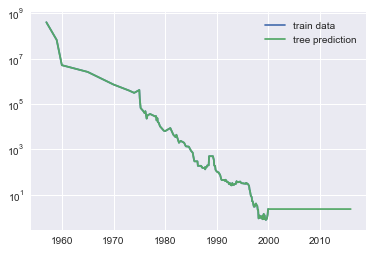

In [13]:

plt.semilogy(data_train.date, data_train.price, label='train data')
#plt.semilogy(data_test.date, data_test.price, label='test data')
plt.semilogy(ram_prices.date, price_tree, label='tree prediction')
#plt.semilogy(ram_prices.date, price_lr, label='linear regression prediction')
plt.legend()

- 트리 모델이 시계열 데이터에는 잘 맞지 않다. 또한 트리의 복잡도를 제한을 두지 않아서 모든 데이터셋을 모두 기억하기 때문에, 훈련 데이터 밖의 새로운 데이터를 예측할 능력이 없다.
## 사전 가지치기 방법
- 
- max_depth : 트리의 깊이
- max_leaf_nodes : 리프노드의 최대 개수
- min_samples_leaf : 리프노드가 되기 위한 최소한의 샘플 갯수
- min_samples_split : 노드가 분기할 수 있는 최소 샘플 개수( 분기할 수 없으면 리프노드)
- 
- 데이터 스케일의 영향을 받지 않으므로 결정 트리에서는 특성의 정규화나 표준화같은 전처리 과정이 필요없고, 특성의 스케일이 서로 다르거나 이진 특성과 연속적인 특성이 혼합되어 있을 때에도 많이 사용 된다. 
- 단점은 사전 가지치기를 사용하더라도 과대적합되는 경향이 있어 일반화 성능은 좋지 않다. 이 닩ㅁ을 해결 한 것이 앙상블 기법을 통해 단일 결정 트리의 대안으로 사용된다.

# 결정 트리의 앙상블
- 앙상블은 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법이다.
- 랜덤 포레스트와 그래디언트 부스팅은 기본요소로 결정트리를 사용한다.(결정트리 말고 딴거 써도 된다더라)

## 랜덤 포레스트
- 조금씩 다른 여러 결정 트리의 묶음
- 각 트리는 비교적 예측을 잘 할 수 있지만, 과대적합한다는 경향을 가진다. 
- 따라서 데이터의 일부에 각자 다른 방향으로 과대적합하는 트리들을 많이 만들어 그 결과를 평균냄으로써 과대적합을 줄일 수 있다. 
- 이런 과정으로 예측 성능이 유지되면서 과대저갑이 줄어드는 것이 수학적으로 증명되었다.
- 부트스트랩 샘플 생성 n_samples개의 데이터 포인트중 무작위로 데치터를 n_samples 횟수만큼 반복 추출
- 이 데이터셋은 원래 데이터 셋크기와 같지만, 어떤 데이터 포인트는 누락될 수도 있고 어떤 데이터 포인트는 중복되어 있을 수있ㄷ.
- 예를 들어 ['a'. 'b', 'c', 'd']에서 부트스트랩 모델은 ['b', 'd', 'd', 'c']도 될 수 있고, ['d', 'a', 'd', 'a']와 같은 샘플도 만들어 질 수있다. 
- 이렇게 만든 데이터셋으로 결정 트리 생성
- 단 각 노드에서 전체 특성을 대상으로 최선의 테스트를 찾는 것이 아니고, 알고리즘이 각 노드에서 후보특 성을 무작위로 선택하고, 이 후보들 중에 최선의 테스트를 찾는다. 
- 몇개의 특성을 고를지는 max_features 매개변수로 조정
- 후보 특성을 고르는 것은 매 노드마다 반복하여, 트리의 각 노드는 다른후보 특성들을 사요하여 테스트를 만든다. 
- 정리하면 부트스트랩 샘플링을 통해 랜덤 포레스트의 트리가 조금씩 다른 데이터셋을 통해 만들어지도록 하고, 트리의 각 분기는 각기 다른 특성 부분집합을 사용한다. 이 두 메커니즘이 합쳐져서 존재하는 모든 트리가 서로 달라지도록 한다.
- 핵심매개변수는 max_features, max_features =n_features면 트리의 각 분기에서 모든 특성을 고려하므로, 특성선택에 무작위성이 배제된다. - 반대로 1로 설정하면, 트리의 분기는 테스트할 특성을 고르지 않고, 그냥 무작위로 선택한 특성의 임계값을 찾기만 하면 된다. 
- 따라서 max_features 값을 크게하면 랜덤포레스트의 트리들은 매우 비슷해지고, 각각 두드러진 틋ㅇ을 이용해 데이터에 잘 맞춰질 것이고, 낮으면 각 트리는 데이터에 맞추기 위해 깊이가 깊어지게 된다. 
- 회귀의 경우는 모델에 존재하는 모든 예측들을 평균하여 최종 예측을 만든다.
- 분류는 약한 투표전략을 사용하여, 앍리즘이 가능성있는 출력 레이블의 확률을 제공함으로써, 간접적 예측을 하고 트리들이 예측한 확률들을 평균내어 가장 높은 확률을 가진 클래스가 예측값이 된다.

## 랜덤 포레스트 분석
- two_moon 데이터셋으로 트리 5개의 랜덤포레스트 모델 구축

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, y = make_moons(n_samples=100, noise=0.25, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

forest = RandomForestClassifier(n_estimators= 5, random_state = 2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

훈련 세트 정확도 : 0.9600
테스트 세트 정확도 : 0.9200


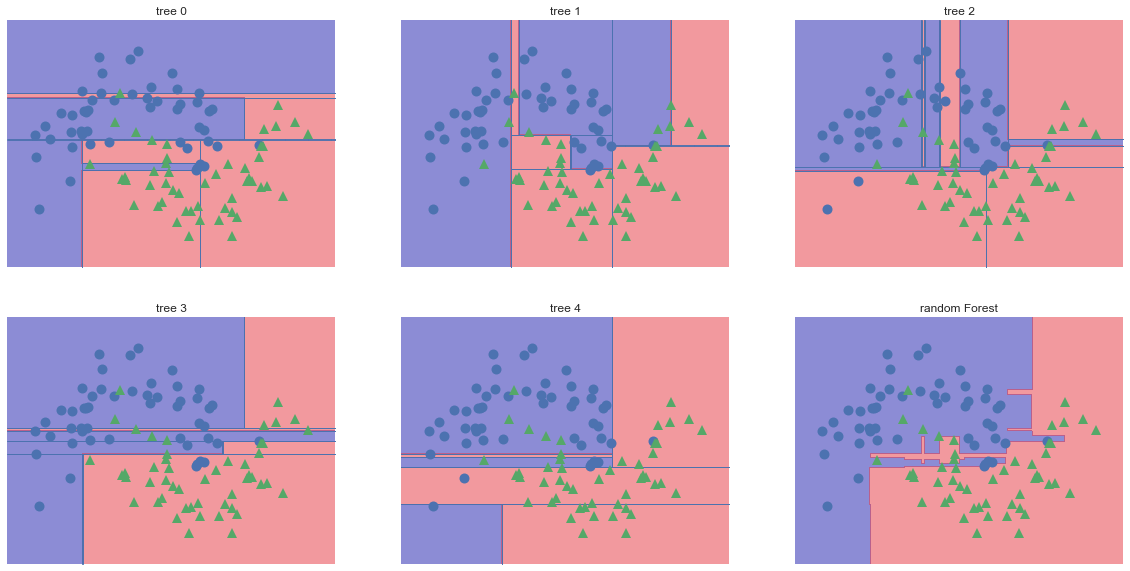

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('random Forest')
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
print('훈련 세트 정확도 : {:.4f}'.format(forest.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.4f}'.format(forest.score(X_test, y_test)))

In [16]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 42)
forest = RandomForestClassifier(n_estimators=100, random_state = 0)
forest.fit(X_train, y_train)

print('훈련 세트 정확도 : {:.4f}'.format(forest.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.4f}'.format(forest.score(X_test, y_test)))

훈련 세트 정확도 : 1.0000
테스트 세트 정확도 : 0.9720


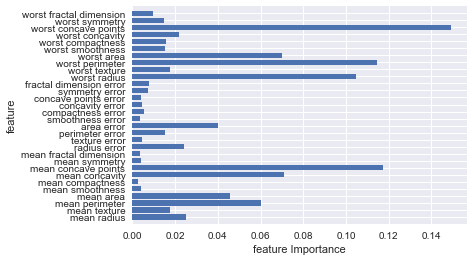

In [17]:
plot_feature_importances_cancer(forest)

- 의사 결정과정을 간소하게 표현해야 한다면 단일 트리를 사용할 수 있다. 랜덤포레스트의 트리는 결정트리보다 더 깊어지고, 시각화가 어렵다.
- 랜덤포레스트는 이름 그대로 랜덤하기 때문에 random_state를 다르게 지정하면 전혀 다른 모델이 만들어진다. 트리가 많아 질수록 값에 따른 변동이 적다. 
- 텍스트 데이터와 같이 매우 차원이 높고 희소한 데이터에서는 부적합하나, 선형모델과 큰 데이터셋에 적합하다.
- 중요 매개변수는 트리의 갯수(n_estimators), 각 분기의 특성 선택 수(max_features) 트리 깊이(max_depth)와 같은 사전 가지치기 옵션이 존재한다. 
- 분류에서는 max_features = sqrt(n_features), 회귀에서는 max_features = n_features가 기본적이다(default로 지정되어있다.)

## 그래디언트 부스팅 회귀 트리
- 그래디언트 부스팅 회귀 트리는 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 앙상블 기법이다. 
- 트리들은 무작위성이 없고, 강력한 사전 가지치기 방법 사요
- 얕은 모델(약한 학습기)를 많이 연결하여, 점점 강한 학습기를 만드는 것이다. 트리가 많이 추가 될수록 성능이 좋아진다. 
- 이전 트리의 오차를 얼마나 강하게 보정할 것인지는 learning_rate를 이용한다. 


In [18]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)


print('훈련 세트 정확도 : {:.4f}'.format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.4f}'.format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 1.0000
테스트 세트 정확도 : 0.9580


- 훈련 세트 정확도가 1이므로 과대적합한 것으로 보인다.
- 과대적합을 막기 위해서 사전 가지치기를 강하게 하거나 학습률을 낮춘다.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)


print('훈련 세트 정확도 : {:.4f}'.format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.4f}'.format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 0.9906
테스트 세트 정확도 : 0.9720


In [20]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
gbrt = GradientBoostingClassifier(random_state=0, learning_rate = 0.01)
gbrt.fit(X_train, y_train)


print('훈련 세트 정확도 : {:.4f}'.format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.4f}'.format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 0.9883
테스트 세트 정확도 : 0.9650


- 강한 사전가지치기는 학습률 낮추는 것에 비해서 테스트 세트 정확도를 높였다.


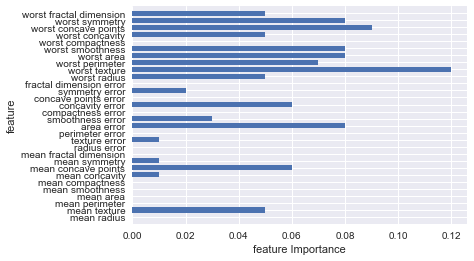

In [21]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

- 그래디언트 부스팅에서는 n_estimator를 지나치게 크게하면 과대적합될 가능성이 높아진다. 
- max_depth나 max_leaf_nodes는 각 트리의 복잡도를 낮추어 과대적합을 막을 수 있다.

# 커널 서포트 벡터 머신
- 선형 서포트 벡터 머신을 다룬바 있다.
- 단순한 초평면으로 정의 되지 않는 더 복잡한 모델을 만들 수 있도록 확장한다. 


### 선형 모델과 비선형 특성
- 직선과 초평면은 유연하지 못해서 저차원 데이터셋에서는 선형 모델이 제한적이다.
- 선형 모델을 유여하게 만드는 한 가지 방법은 특성끼리 곱하거나 특성을 거듭제곱하는 식으로 새로운 특성을 추가하는 것이다.

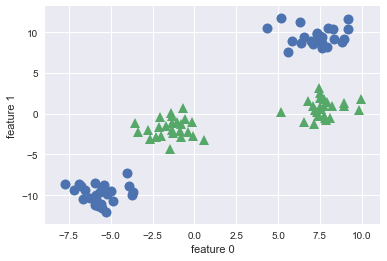

In [22]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state = 8)
y = y%2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

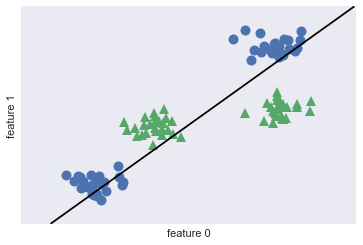

In [23]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

- 두번쨰 특성을 제곱한 특성1 ^ 2를 새로운 특성으로 추가해 (특성0, 특성1, 특성1 **2)의 3차원 데이터로 바뀐다.

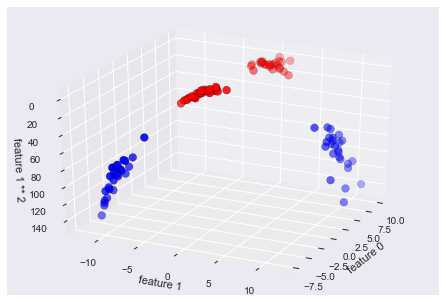

In [24]:
X_new = np.column_stack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim = -26)
# y==0인 포인트를 먼저 그리고 그다음 y==1인 포인트를 그린다
mask = y==0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c= 'b', cmap=mglearn.cm2, s=60, edgecolor = 'k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c= 'r', cmap=mglearn.cm2, s=60, edgecolor = 'k')
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature 1 ** 2')

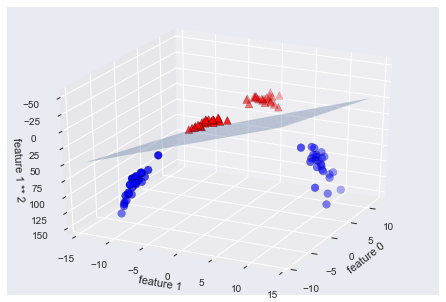

In [25]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

#선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx= np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() -2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c= 'b',  cmap = mglearn.cm2, s=60, edgecolor= 'k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c= 'r', marker = '^', cmap = mglearn.cm2, s=60, edgecolor= 'k')

ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature 1 ** 2')

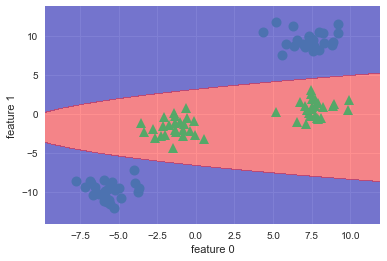

In [26]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels = [dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha = 0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

## 커널 기법
- 수학적 기교를 이용해 새로운 특성을 많이 만들지 않고 고차원에서 분류기를 학습하는 방법
- 실제로 데이터를 확장하지 않고 확장된 특성에 대한 데이터 포인트들의 거리(스칼라 곱)을 계산
- 고차원 공간에 맵핑하는 방법으로는 특성의 가능한 조합을 지정된 차수까지 모두 계산(예를 들어 특성1 ** 2 x 특성2 ** 5) 하는 다항식 커널이 있고, 가우시안 커널로도 불리우는 RBF(radial basis function) 커널이 있다. 

## SVM 이해하기
- 학습이 진행되는 동안 SVM은 각 훈련데이터 포인트가 두 클래스 사이의 결정 경계를 구분하는 얼마나 주요한가를 배우게 된다. 
- 주로 클래스사이의 경계에 위치한 데이터 포인트들이 결정 경계를 만드는 데 영향을 준다. 
- 이러한 데이터 포인트를 서포트 벡터(Support Vector)라고 한다. 
- 새로운 데이터 포인트에 대해 예측하려면 각 서포트 벡터와의 거리를 측정하여 이를 기반으로 분류를 결정한다.
- 데이터 포인트 사이의 거리는 가우시안 커널에 의해 계산
\begin{equation*}
k_{rbf}(x_1, x_2) = exp(-gamma || x_1 - x_2 ||^2)
\end{equation*}

- x1, x2는 데이터 포인트이고 ||x1 - x2||는 유클리디안 거리이고 gamma는 가우시안 커널의 폭을 제어하는 매개변수

In [27]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel = 'rbf', C=10, gamma=0.1).fit(X, y)

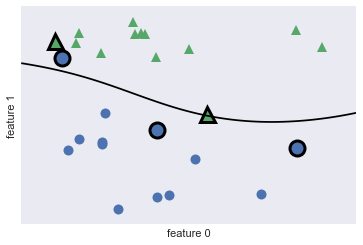

In [37]:
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
# 서포트 벡터
sv = svm.support_vectors_
# dual_coef_ 의 부호에 의해 서포트 벡터의 클래스 레이블이 결정
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

## SVM 매개변수 튜닝
- gamma 매개변수는 가우시안 커널 폭의 역수에 해당한다. 
- gamma 매개변수가 하나의 훈련 샘플이 미치는 영향의 범위를 결정
- 작은 값은 넓은 여역, 큰 값이라면 영향이을 미치는 범위가 작아진다. 
- 즉, 가우시안 커널의 변경이 클 수록 훈련 샘플의 영향 범위도 커진다. 
- C 매개변수는 선형 모델에서 사용한 것과 비슷한 규제 매개변수로 각 포인트의 중요도(dual_coef_)값을 제한한다.
- C가 커지면 서포트 벡터로 사용하는 데이터 포인트들을 적게 잡는다.

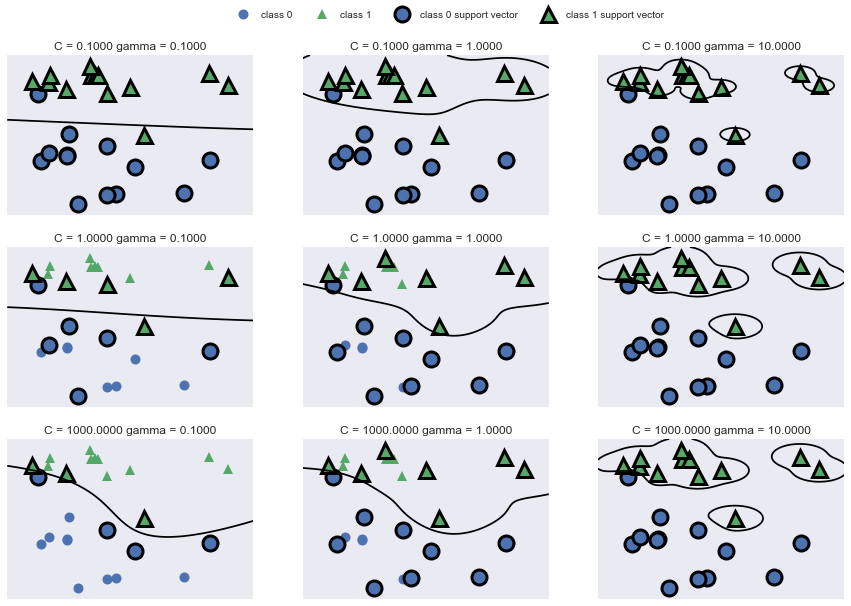

In [50]:
fig,axes = plt.subplots(3, 3, figsize = (15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C= C, log_gamma= gamma, ax= a)

axes[0, 0].legend(['class 0', 'class 1', 'class 0 support vector', 'class 1 support vector'], ncol = 4, loc = (.9, 1.2))

In [52]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

svc = SVC()
svc.fit(X_train, y_train)

print('훈련 세트 정확도 : {:.4f}'.format(svc.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.4f}'.format(svc.score(X_test, y_test)))

훈련 세트 정확도 : 1.0000
테스트 세트 정확도 : 0.6294


- 훈련세트에서 100퍼센트이나 새로운 데이터에는 영 좋지않아 과대적합되었다.

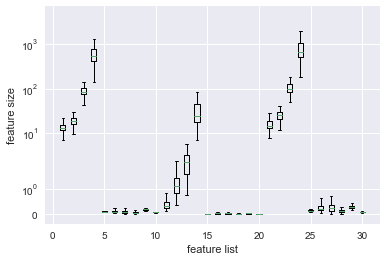

In [53]:
plt.boxplot(X_train, manage_xticks = False)
plt.yscale('symlog')
plt.xlabel('feature list')
plt.ylabel('feature size')

## SVM을 위한 데이터 전처리
- 위와 같이 각 특성들의 범위가 중구난방이기 때문에, 제대로 된 결과가 달라진다. 이를 해결하기 위해 특성 값의 범위가 비슷해지도록 조정하는 것을 스케일링이라고 한다. 

In [58]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis =0)
# 훈련 세트에서 특성별 (최대값 - 최소값) 범위 계산
range_on_training = (X_train- min_on_training).max(axis = 0)

X_train_scaled = (X_train - min_on_training)/ range_on_training
X_test_scaled = (X_test - min_on_training)/ range_on_training
svc = SVC()
svc.fit(X_train_scaled, y_train)

print('훈련 세트 정확도 : {:.4f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도 : {:.4f}'.format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도 : 0.9484
테스트 세트 정확도 : 0.9510


- 훈련 세트와 테스트 세트가 매우 비슷해서 과소적합된 상태라고 볼 수 있다.

In [59]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print('훈련 세트 정확도 : {:.4f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도 : {:.4f}'.format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도 : 0.9883
테스트 세트 정확도 : 0.9720


## 장단점과 매개변수
- 커널 서포트 벡터 머신은 강력한 모델이며 다양한 데이터셋에서 작동한다.
- 데이터의 특성이 몇 개 안되더라도 복잡한 결정 경계 형성
- 저차원과 고차원의 데이터 모두 잘 작동하지만 샘플이 많을 때는 (10만개 이상) 잘 맞지 않는다. 
- 데이터 전처리와 매개변수 설정에 민감하다( 랜덤포레스트나 그래디언트 부스팅은 전처리가 거의 필요없다)
- 모든 특성이 비슷한 단위이고 스케일이 비슷하면 우수하다. 